## Content
* 卷积计算过程
* 感受野
* 全零填充（Padding）
* TF描述卷积计算层
* 批标准化（Batch Normalization, BN）
* 池化（Pooling）
* 舍弃（Dropout）
* 卷积神经网络
* cifar10 数据集
* 卷积神经网络搭建实例
* 实现LeNet、AlexNet、VGGNet、InceptionNet、ResNet五个经典卷积网络

## 感受野（Receptive Field）
感受野是卷积神经网络各输出特征图中的每个像素点在原始输入图片上的大小。
对一个 5x5 的输入图使用 3x3 的卷积核，得到一次 3x3 的输出特征图。再用一个 3x3 的卷积核做一次，得到 1x1 的输出特征图。此时最后 1x1 的输出特征图的感受野是5。
对一个 5x5 的输入图使用 5x5 的卷积核，直接得到 1x1 的输出特征图。两者特征提取能力是一样的，但计算量是不一样的。

设输入特征图宽、高为x，卷积计算步长为1.
* 两层 3x3
参数量：9+9=18
计算量：18x^2 + 108x + 180

* 一层 5x5
参数量：25
计算量：25x^2 - 200x + 400

当x>10时，两层 3x3 卷积核优于一层 5x5 的卷积核。

## 全零填充（Padding）
5x5 的原图通过 3x3 的卷积核得到 3x3 的输出特征图。为了保持原图与输入特征图的尺寸一样，会在边缘位置填充0，这样可以得到 5x5 的输出特征图。
当参数 padding = 'SAME'，填充0，padding = 'VALID'，不填充。

## TF描述卷积层
会使用多个卷积层和池化。
```python
tf.keras.layers.Conv2D (
    filters = 卷积核个数,
    kernel_size = 卷积核尺寸, #正方形写核长整数，或（核高h，核宽w）
    strides = 滑动步长, #横纵向相同写步长整数，或(纵向步长h，横向步长w)，默认1
    padding = “same” or “valid”, #使用全零填充是“same”，不使用是“valid”（默认）
    activation = “ relu ” or “ sigmoid ” or “ tanh ” or “ softmax”等 , #如有BN此处不写
    input_shape = (高, 宽 , 通道数) #输入特征图维度，可省略
)
```

## 批标准化（Batch Normalization, BN）
神经网络对0附近的数据敏感，而且随着神经网络深入，数值会开始偏离0，所以要做标准化。常用在卷积操作和激活操作之间。将数据拉回0附近后，激活函数的效果更好。

但是标准正态分布过于聚集在0附近，使得数据丧失了激活函数两端非线性的效果，因此引入额外训练参数：缩放因子和偏移因子。优化宽窄和偏移量。以下代码自动包含两个因子。
```python
BatchNormalization()
```


## 池化（Pooling）
池化用于减少特征数据量。最大值池化可提取图片纹理（主要特征），均值池化可保留背景特征（平均特征）。
```python
tf.keras.layers.MaxPool2D(
    pool_size = 池化核尺寸,  #正方形写核长整数，或（核高h，核宽w）
    strides = 池化步长,  #步长整数，或(纵向步长h，横向步长w)，默认为pool_size
    padding = ‘valid’or‘same’  #使用全零填充是“same”，不使用是“valid”（默认）
)

tf.keras.layers.AveragePooling2D(
    pool_size = 池化核尺寸,  #正方形写核长整数，或（核高h，核宽w）
    strides = 池化步长,  #步长整数，或(纵向步长h，横向步长w)，默认为pool_size
    padding = ‘valid’or‘same’  #使用全零填充是“same”，不使用是“valid”（默认）
)
```

## 舍弃（Dropout）
为了缓解过拟合，在神经网络训练时，将一部分神经元按照一定概率从神经网络中暂时舍弃。神经网络使用时，被舍弃的神经元恢复链接。
```python
Dropout(0.2)   # 20% Dropout 率
```

## 总结：卷积 -> 批标准化 -> 激活 -> 池化 -> 全连接
C B A P D
```python
model = tf.keras.models.Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), padding='same'), # 卷积层
    BatchNormalization(), # BN层
    Activation('relu'), # 激活层
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'), # 池化层
    Dropout(0.2), # dropout层
])
```


## Cifar10 coloured dataset
### Load data
```plt.imshow()```接收的彩色图片的数据类型可以是区间 0-255 的整数类型，或者区间 0-1 的浮点类型。

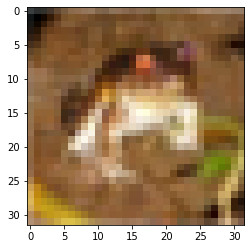

x_train.shape:
 (50000, 32, 32, 3)
y_train.shape:
 (50000, 1)
x_test.shape:
 (10000, 32, 32, 3)
y_test.shape:
 (10000, 1)


In [5]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0])  # 绘制图片
plt.show()

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)

## Build CNN
结构：<br>
C（核：6 * 5 * 5，步长：1，填充：same）<br>
B（Yes）<br>
A（relu）<br>
P（max，核：2 * 2，步长：2，填充：same）<br>
D（0.2）<br>

Flatten <br>
Dense（神经元：128，激活：relu，Dropout：0.2）<br>
Dense（神经元：10，激活：softmax）<br>

-------------load the model-----------------
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 6s 114us/sample - loss: 1.1122 - sparse_categorical_accuracy: 0.6051 - val_loss: 1.1764 - val_sparse_categorical_accuracy: 0.5838
Epoch 2/5
50000/50000 [==============================] - 5s 101us/sample - loss: 1.0994 - sparse_categorical_accuracy: 0.6124 - val_loss: 1.1365 - val_sparse_categorical_accuracy: 0.6022
Epoch 3/5
50000/50000 [==============================] - 5s 97us/sample - loss: 1.0776 - sparse_categorical_accuracy: 0.6180 - val_loss: 1.1653 - val_sparse_categorical_accuracy: 0.5928
Epoch 4/5
50000/50000 [==============================] - 5s 96us/sample - loss: 1.0652 - sparse_categorical_accuracy: 0.6238 - val_loss: 1.1773 - val_sparse_categorical_accuracy: 0.5908
Epoch 5/5
50000/50000 [==============================] - 5s 96us/sample - loss: 1.0422 - sparse_categorical_accuracy: 0.6324 - val_loss: 1.1040 - val_sparse_ca

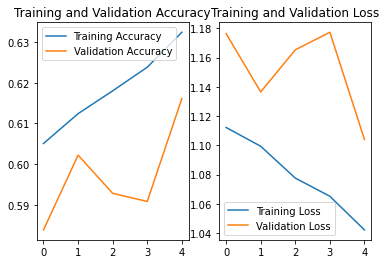

In [13]:
allow_load_model = 1
os.chdir("D:\Programming\python\Tensorflow Tutorial\class5\CIFAR10_CNN")

class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y

model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index') and allow_load_model:
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## LeNet
LeNet由Yann LeCun于1998年提出，卷积网络开篇之作。<br>
Yann Lecun, Leon Bottou, Y. Bengio, Patrick Haffner. Gradient-Based Learning Applied to Document Recognition. Proceedings of the IEEE, 1998.

结构：<br>
C（核：6*5*5，步长：1，填充：valid）<br>
B（None）<br>
A（sigmoid）<br>
P（max，核：2*2，步长：2，填充：valid）<br>
D（None）<br>

C（核：16*5*5，步长：1，填充：valid）<br>
B（None）<br>
A（sigmoid）<br>
P（max，核：2*2，步长：2，填充：valid）<br>
D（None）<br>

Flatten <br>
Dense（神经元：128，激活：sigmoid）<br>
Dense（神经元：84，激活：sigmoid）<br>
Dense（神经元：10，激活：softmax）<br>

In [ ]:
class LeNet5(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid')  # 卷积层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)  # 池化层
        
        self.c2 = Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid')  # 卷积层
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)  # 池化层

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)
        
        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

## AlexNet
AlexNet网络诞生于2012年，当年ImageNet竞赛的冠军，Top5错误率为16.4%。 <br>
Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton. ImageNet Classification with Deep Convolutional Neural
Networks. In NIPS, 2012. <br>
为适应训练集，部分卷积核大小做调整！

C（核：96*3*3，步长：1，填充：valid）<br>
B（Yes）<br>
A（relu）<br>
P（max，核：3*3，步长：2）<br>
D（None）<br>

C（核：256*3*3，步长：1，填充：valid）<br>
B（Yes）<br>
A（relu）<br>
P（max，核：3*3，步长：2)<br>
D（None)<br>

C（核：384*3*3，步长：1，填充：same）<br>
B（None）<br>
A（relu）<br>
P（None）<br>
D（None）<br>

C（核：384*3*3，步长：1，填充：same）<br>
B（None）<br>
A（relu）<br>
P（None）<br>
D（None）<br>

C（核：256*3*3，步长：1，填充：same）<br>
B（None）<br>
A（relu）<br>
P（max，核：3*3，步长：2）<br>
D（None）<br>

Flatten<br>
Dense（神经元：2048，激活：relu，Dropout：0.5）<br>
Dense（神经元：2048，激活：relu，Dropout：0.5）<br>
Dense（神经元：10，激活：softmax）

In [ ]:
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y

## VGGNet
VGGNet诞生于2014年，当年ImageNet竞赛的亚军，Top5错误率减小到7.3%。 <br>
K. Simonyan, A. Zisserman. Very Deep Convolutional Networks for Large-Scale Image Recognition.In ICLR, 2015.<br>
越往后特征尺寸图越小，通过增加卷积核（filter）个数，增加了特征图深度。保持信息承载能力。<br>

C（核：64 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：64 * 3 * 3，步长：1，填充：same）B（Yes）A（relu）P（max，核：2*2，步长：2）D（0.2）

C（核：128 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：128 * 3 * 3，步长：1，填充：same）B（Yes）A（relu）P（max，核：2*2，步长：2）D（0.2）

C（核：256 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：256 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：256 * 3 * 3，步长：1，填充：same）B（Yes）A（relu）P（max，核：2*2，步长：2）D（0.2）

C（核：512 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：512 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：512 * 3 * 3，步长：1，填充：same）B（Yes）A（relu）P（max，核：2*2，步长：2）D（0.2）

C（核：512 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：512 * 3 * 3，步长：1，填充：same ）B（Yes）A（relu）<br>
C（核：512 * 3 * 3，步长：1，填充：same）B（Yes）A（relu）P（max，核：2*2，步长：2）D（0.2）

Flatten
Dense（神经元：512，激活：relu，Dropout：0.2）<br>
Dense（神经元：512，激活：relu，Dropout：0.2）<br>
Dense（神经元：10，激活：softmax）

In [ ]:
class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  # 卷积层1
        self.b1 = BatchNormalization()  # BN层1
        self.a1 = Activation('relu')  # 激活层1
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization()  # BN层1
        self.a2 = Activation('relu')  # 激活层1
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d1 = Dropout(0.2)  # dropout层

        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization()  # BN层1
        self.a3 = Activation('relu')  # 激活层1
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()  # BN层1
        self.a4 = Activation('relu')  # 激活层1
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # dropout层

        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  # BN层1
        self.a5 = Activation('relu')  # 激活层1
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  # BN层1
        self.a6 = Activation('relu')  # 激活层1
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = Dropout(0.2)

        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()  # BN层1
        self.a8 = Activation('relu')  # 激活层1
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()  # BN层1
        self.a9 = Activation('relu')  # 激活层1
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)

        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization()  # BN层1
        self.a11 = Activation('relu')  # 激活层1
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()  # BN层1
        self.a12 = Activation('relu')  # 激活层1
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = Dropout(0.2)

        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d6(x)
        x = self.f2(x)
        x = self.d7(x)
        y = self.f3(x)
        return y

## InceptionNet
InceptionNet诞生于2014年，当年ImageNet竞赛冠军，Top5错误率为6.67%。<br>
Szegedy C, Liu W, Jia Y, et al. Going Deeper with Convolutions. In CVPR, 2015.<br>

最后送到卷积连接器的特征数据尺寸相同，卷积连接器会把收到的这四个特征数据按深度方向拼接，形成输出。

### 1x1 卷积核
如果卷积的输出输入都只是一个平面，那么1x1卷积核并没有什么意义，它是完全不考虑像素与周边其他像素关系。 但卷积的输出输入是长方体，所以1x1卷积实际上是对每个像素点，在不同的channels上进行线性组合（信息整合），且保留了图片的原有平面结构，调控depth，从而完成升维或降维的功能。

如果5x5x3的输入选择2个filters的1x1卷积层，那么数据就从原本的depth 3 降到了2。若用4个filters，则起到了升维的作用。
    
这就是为什么上面Inception的4个选择中都混合一个1x1卷积，如右侧所展示的那样。 其中，绿色的1x1卷积本身就1x1卷积，所以不需要再用另一个1x1卷积。 而max pooling用来去掉卷积得到的Feature Map中的冗余信息，所以出现在1x1卷积之前，紧随刚被卷积后的feature maps。（由于没做过实验，不清楚调换顺序会有什么影响。）

In [ ]:
class ConvBNRelu(Model):
    # ch 表示 channel，就是卷积核个数
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        # 在training=False时，BN通过整个训练集计算均值、方差去做批归一化。
        # training=True时，通过当前batch的均值、方差去做批归一化。
        # 推理时 training=False效果好。
        x = self.model(x, training=False)
        return x


class InceptionBlk(Model):
    def __init__(self, ch, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch
        self.strides = strides
        
        self.c1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        
        self.c2_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_2 = ConvBNRelu(ch, kernelsz=3, strides=1)
        
        self.c3_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c3_2 = ConvBNRelu(ch, kernelsz=5, strides=1)
        
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')
        self.c4_2 = ConvBNRelu(ch, kernelsz=1, strides=strides)

    def call(self, x):
        x1 = self.c1(x)
        
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        
        x4_1 = self.p4_1(x)
        x4_2 = self.c4_2(x4_1)
        
        # concat along axis = channel 沿深度方向
        x = tf.concat([x1, x2_2, x3_2, x4_2], axis=3)
        return x


class Inception10(Model):
    def __init__(self, num_blocks, num_classes, init_ch = 16, **kwargs):
        super(Inception10, self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        # 多少大块
        self.num_blocks = num_blocks
        self.init_ch = init_ch
        
        self.c1 = ConvBNRelu(init_ch)
        self.blocks = tf.keras.models.Sequential()
        for block_id in range(num_blocks):
            for layer_id in range(2):
                if layer_id == 0:
                    block = InceptionBlk(self.out_channels, strides=2)
                else:
                    block = InceptionBlk(self.out_channels, strides=1)
                self.blocks.add(block)
            # enlarger out_channels per block
            # 第一个Inception结构块输出特征图尺寸减半，因此把输出特征图深度加深，尽可能保证特征抽取中信息的承载量一致
            self.out_channels *= 2
        self.p1 = GlobalAveragePooling2D()
        self.f1 = Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

# 两个Block，输出10分类
model = Inception10(num_blocks=2, num_classes=10)
# 由于模型训练缓慢，常增长batch size来提高GPU使用率。

## ResNet
ResNet 诞生于2015年，当年ImageNet竞赛冠军，Top5错误率为3.57% <br>
Kaiming He, Xiangyu Zhang, Shaoqing Ren. Deep Residual Learning for Image Recognition. In CPVR, 2016. <br>


In [ ]:
class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        # residual_path为True时，对输入进行维度调整，即用1x1的卷积核做同步长的卷积操作，保证x能和F(x)维度相同，顺利相加
        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')

    def call(self, inputs):
        residual = inputs  # residual等于输入值本身，即residual=x
        # 将输入通过卷积、BN层、激活层，计算F(x)
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)

        x = self.c2(x)
        y = self.b2(x)

        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)

        out = self.a2(y + residual)  # 最后输出的是两部分的和，即F(x)+x或F(x)+Wx,再过激活函数
        return out


class ResNet18(Model):

    def __init__(self, block_list, initial_filters=64):  # block_list表示每个block有几个卷积层
        super(ResNet18, self).__init__()
        self.num_blocks = len(block_list)  # 共有几个block
        self.block_list = block_list
        self.out_filters = initial_filters
        self.c1 = Conv2D(self.out_filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.blocks = tf.keras.models.Sequential()
        
        # 构建ResNet网络结构
        # 第一层为双实线，之后全为一虚一实
        for block_id in range(len(block_list)):  # 第几个resnet block
            for layer_id in range(block_list[block_id]):  # 第几个卷积层

                if block_id != 0 and layer_id == 0:  # 对除第一个block以外的每个block的输入进行下采样
                    block = ResnetBlock(self.out_filters, strides=2, residual_path=True)
                else:
                    block = ResnetBlock(self.out_filters, residual_path=False)
                    
                self.blocks.add(block)  # 将构建好的block加入resnet
            self.out_filters *= 2  # 下一个block的卷积核数是上一个block的2倍
        self.p1 = tf.keras.layers.GlobalAveragePooling2D()
        self.f1 = tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y


model = ResNet18([2, 2, 2, 2])